In [1]:
from textwrap import wrap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
paths = [
    (r"../../../outputs/results/batch_16356733_result.csv", "Mistral-7B-Instruct-v0.3"),
    (r"../../../outputs/results/batch_16361042_result.csv", "Qwen2.5-14B-Instruct"),
    (r"../../../outputs/results/batch_16361563_result.csv", "Llama-3.3-70B-Instruct")
]
LABELS = [["yes", "partially", "no"], ["yes", "partially", "no"], ["yes", "no"]] # Labels per column
COLS = ['The exercise description matched the selected theme (Yes/Partially/No)',
       'The exercise description matched the selected topic (Yes/Partially/No)',
       'The exercise description matched the selected concept (Yes/No)'] # Names of ground-truth columns

COLS_PRED = ['ThemeCorrect', 'TopicCorrect', 'ConceptCorrect'] # Names of prediction columns

In [16]:
def wrap_text(text, num_chars):
    return '\n'.join(wrap(text, num_chars))


def plot_confusion_matrices(df, axes, labels=LABELS, cols1=COLS, cols2=COLS_PRED):
    fig = axes[0].figure

    for ax, col1, col2, ls in zip(axes, cols1, cols2, labels):
        cm = confusion_matrix(df[col1], df[col2], labels=ls)

        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=ls,
            yticklabels=ls,
            ax=ax
        )

        ax.set_title(wrap_text(f"{col1.upper()} Confusion", 20))
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")

    return fig, axes


def plot_accuracy(df, ax, cols1=COLS, cols2=COLS_PRED):
    fig = ax.figure

    acc = [(df[col1] == df[col2]).mean() for col1, col2 in zip(cols1, cols2)]

    sns.barplot(x=cols1, y=acc, ax=ax)
    ax.set_ylim(0, 1)
    ax.set_ylabel("Accuracy")
    ax.set_title("Accuracy per Label")
    ax.set_xticklabels([wrap_text(col1, 20) for col1 in cols1])

    return fig, ax


def plot_distributions(df, axes, labels=LABELS, cols1=COLS, cols2=COLS_PRED):
    fig = axes[0, 0].figure

    for i, (col1, col2, ls) in enumerate(zip(cols1, cols2, labels)):
        sns.countplot(x=df[col1], order=ls, ax=axes[i, 0])
        axes[i, 0].set_title(wrap_text(f"{col1.upper()} True", 20))

        sns.countplot(x=df[col2], order=ls, ax=axes[i, 1])
        axes[i, 1].set_title(wrap_text(f"{col1.upper()} Predicted", 20))

    return fig, axes


def build_figure_for_csv(path,
                         labels=LABELS,
                         cols1=COLS,
                         cols2=COLS_PRED,
                         conf=True, acc=True, dist=True):

    filepath, model = path
    
    df = pd.read_csv(filepath, sep=";")

    # Layout:
    # Row 0: confusion matrices (3 plots)
    # Row 1: accuracy (1 plot spanning all columns)
    # Row 2-4: distributions (3 rows x 2 columns)

    num_rows = 0
    if conf:
        num_rows += 1
    if acc:
        num_rows += 1
    if dist:
        num_rows += 3

    fig = plt.figure(figsize=(16, num_rows * 6))
    gs = fig.add_gridspec(num_rows, 3)

    # --- Confusion matrices ---
    if conf:
        cm_axes = [
            fig.add_subplot(gs[0, i]) for i in range(3)
        ]
        plot_confusion_matrices(df, cm_axes, labels, cols1, cols2)

    # --- Accuracy (span full width) ---
    if acc:
        acc_ax = fig.add_subplot(gs[1 if conf else 0, :])
        plot_accuracy(df, acc_ax, cols1, cols2)

    # --- Distributions ---
    if dist:
        dist_axes = [
            [fig.add_subplot(gs[num_rows - 3 + i, 0]),
             fig.add_subplot(gs[num_rows - 3 + i, 1])]
            for i in range(len(cols1))
        ]
    
        plot_distributions(df,
                           pd.DataFrame(dist_axes).values,
                           labels,
                           cols1, cols2)

    fig.suptitle(model, fontsize=16)
    fig.tight_layout()

    return fig


def run_on_csvs(csv_paths, conf=True, acc=True, dist=True):
    figs = []

    for path in csv_paths:
        fig = build_figure_for_csv(path, conf=conf, acc=acc, dist=dist)
        figs.append(fig)

    return figs

In [ ]:
figs = run_on_csvs(paths, acc=False, dist=False)

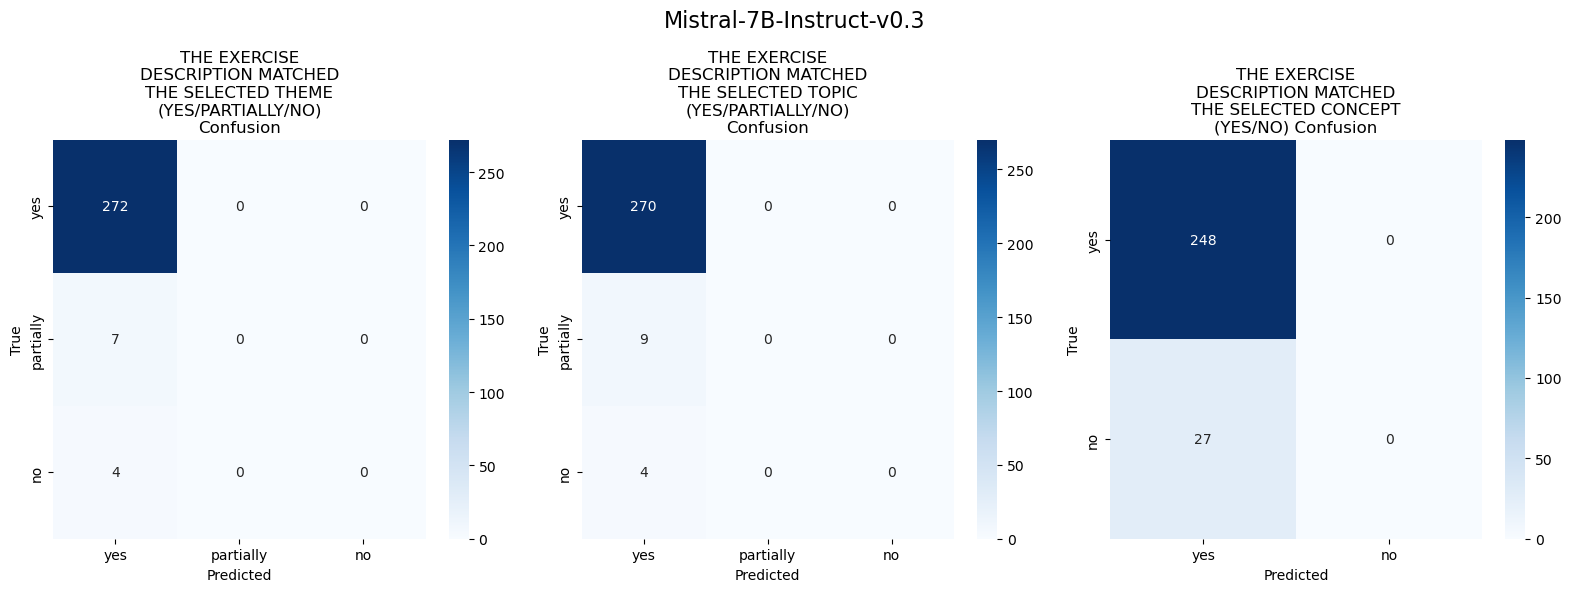

In [21]:
figs[0]

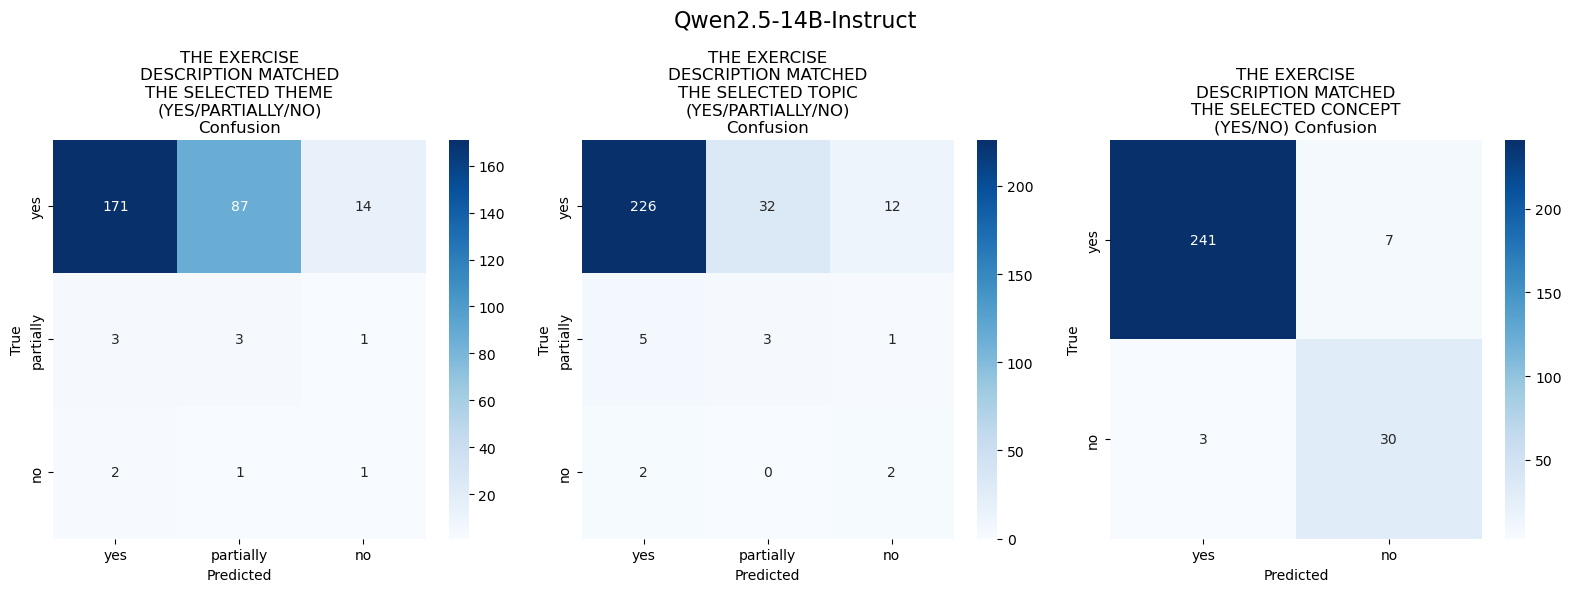

In [20]:
figs[1]

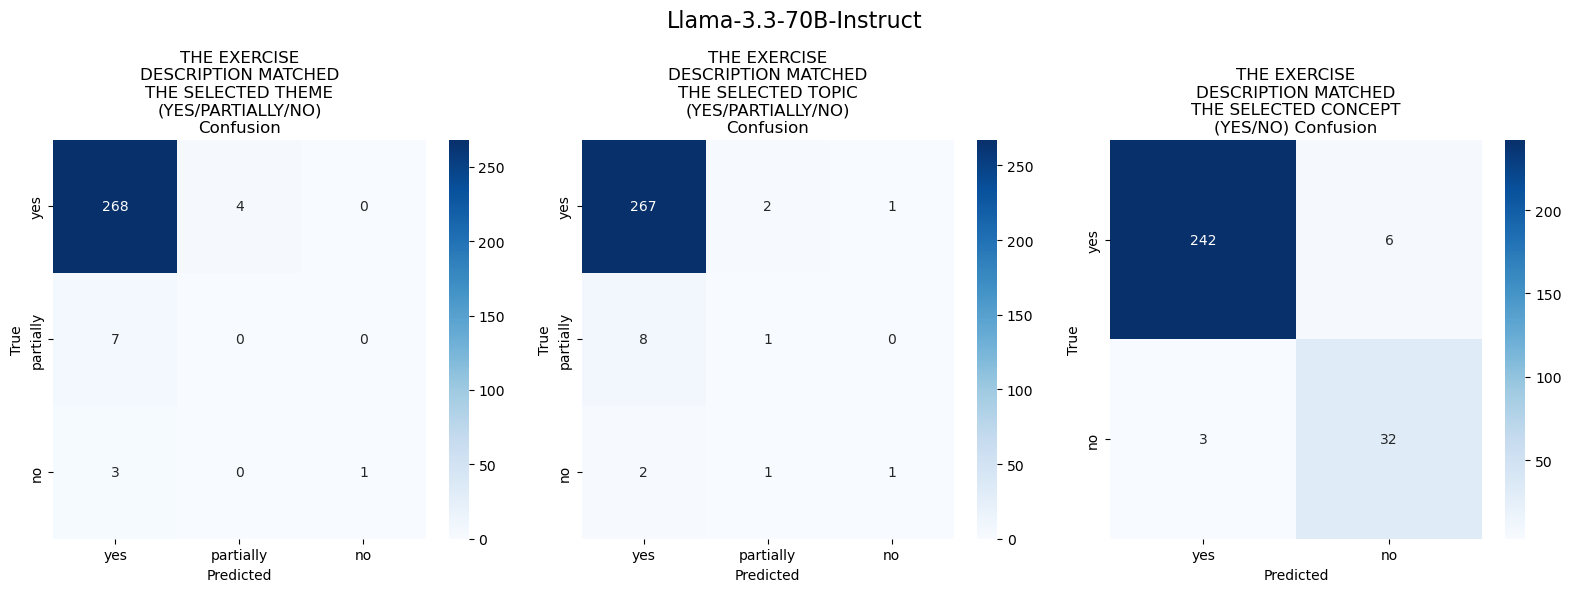

In [18]:
figs[-1]